# Matplotlib: Axes, legends, and annotations

## Axes

When you create a subplot, an [Axes object](https://matplotlib.org/stable/api/axes_api.html#the-axes-class) is returned.

This can be used to customise things you probably associate with axes, e.g. labels, limits, ticks, and tick labels:

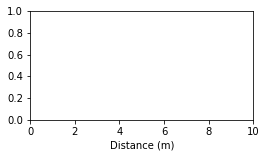

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot()
ax.set_xlabel('Distance (m)')
ax.set_xlim(0, 10)
plt.show()

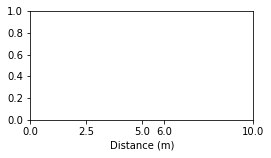

In [2]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot()
ax.set_xlabel('Distance (m)')
ax.set_xlim(0, 10)
ax.set_xticks([0, 2.5, 5, 6, 10])
plt.show()

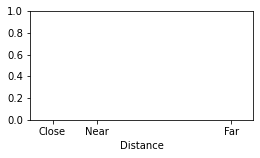

In [3]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot()
ax.set_xlabel('Distance')
ax.set_xlim(0, 10)
ax.set_xticks([1, 3, 9])
ax.set_xticklabels(['Close', 'Near', 'Far'])
plt.show()

But it also controls e.g. frame settings:

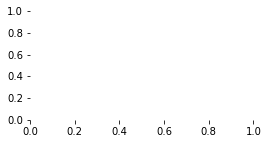

In [4]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(frameon=False)
plt.show()

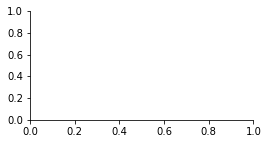

In [5]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Two y-axes

We can add a second y-axes that uses a different scale.

Adding a legend is slightly tricky in this case: we need to do it [manually](https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html).

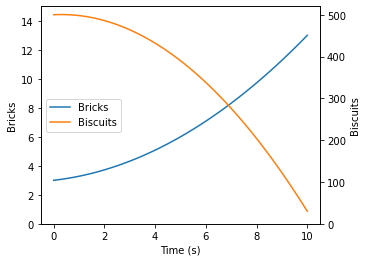

In [6]:
import numpy as np
t = np.linspace(0, 10, 50)
y = 3 + 0.2 * t + 0.08 * t**2
z = 500 + 3 * t - 5 * t**2

fig = plt.figure(figsize=(5, 4))
ax1 = fig.add_subplot()
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Bricks')
ax1.set_ylim(0, 15)
lines1 = ax1.plot(t, y)

ax2 = ax1.twinx()
ax2.set_ylabel('Biscuits')
ax2.set_ylim(0, 520)
lines2 = ax2.plot(t, z, color='tab:orange')

ax2.legend(lines1 + lines2, ['Bricks', 'Biscuits'], loc='center left')
plt.show()

## Legends

Legends can be customised in lots of ways.
But as a rule of thumb, leave it alone unless you have to.

### Removing transparency effect

Matplotlib likes making legends a bit transparent, so that any data hidden by the legend can still be seen:

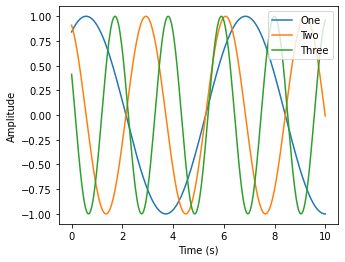

In [7]:
import numpy as np
t = np.linspace(0, 10, 300)
y1 = np.sin(t + 1)
y2 = np.sin(2 * (t + 1))
y3 = np.sin(3 * (t + 3))

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

ax.plot(t, y1, label='One')
ax.plot(t, y2, label='Two')
ax.plot(t, y3, label='Three')

ax.legend(loc='upper right')
plt.show()

For plots appearing in print this is usually a bad idea, so that we disable it:

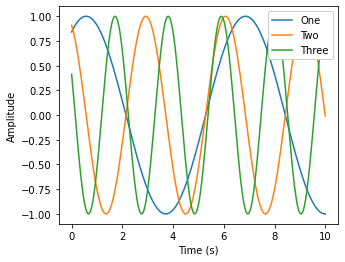

In [8]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.plot(t, y1, label='One')
ax.plot(t, y2, label='Two')
ax.plot(t, y3, label='Three')
ax.legend(loc='upper right', framealpha=1)
plt.show()

Note that the `framealpha` argument to `Axes.legend` is passed to the [Legend object](https://matplotlib.org/stable/api/legend_api.html#matplotlib.legend.Legend) that it creates, which uses it to manipulate its [frame](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html#matplotlib.patches.Rectangle).

We can manipulate the frame ourselves too:

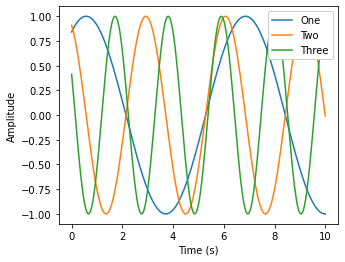

In [9]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.plot(t, y1, label='One')
ax.plot(t, y2, label='Two')
ax.plot(t, y3, label='Three')
legend = ax.legend(loc='upper right')
rectangle = legend.get_frame()
rectangle.set_alpha(1)
plt.show()

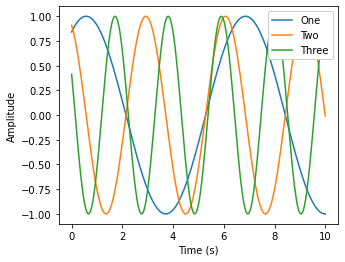

In [10]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.plot(t, y1, label='One')
ax.plot(t, y2, label='Two')
ax.plot(t, y3, label='Three')
legend = ax.legend(loc='upper right')
rectangle = legend.get_frame()
rectangle.set_alpha(1)
plt.show()

### Removing the frame

If we don't want a frame (e.g. to save space), we can remove it.

This is often a bad idea, but see below for some use cases.

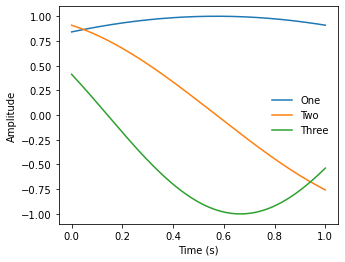

In [11]:
t = np.linspace(0, 1, 300)
y1 = np.sin(t + 1)
y2 = np.sin(2 * (t + 1))
y3 = np.sin(3 * (t + 3))

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')

ax.plot(t, y1, label='One')
ax.plot(t, y2, label='Two')
ax.plot(t, y3, label='Three')

ax.legend(loc='center right', frameon=False)
plt.show()

###  Positioning

We can control where the legend is shown using words like "left", "right", "upper", "lower" and "center".
See [the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html) for a full list.

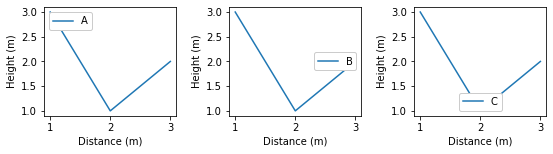

In [12]:
x, y = [1, 2, 3], [3, 1, 2]

fig = plt.figure(figsize=(9, 2))
fig.subplots_adjust(wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
ax.plot(x, y, label='A')
ax.legend(loc='upper left', framealpha=1)

ax = fig.add_subplot(1, 3, 2)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
ax.plot(x, y, label='B')
ax.legend(loc='center right', framealpha=1)

ax = fig.add_subplot(1, 3, 3)
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
ax.plot(x, y, label='C')
ax.legend(loc='lower center', framealpha=1)

plt.show()

Alternatively, we can use coordinates relative to the axes size:

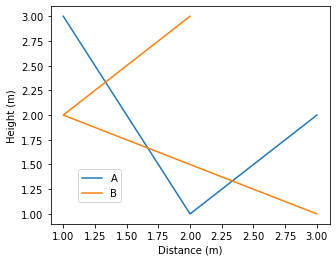

In [13]:
fig = plt.figure(figsize=(5, 4))

ax = fig.add_subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
ax.plot(x, y, label='A')
ax.plot(y, x, label='B')

# Place the lower-left corner of the legend at 10% of the axes width & height
ax.legend(loc=(0.1, 0.1))

plt.show()

#### Positioning outside the axes

We can use this kind of positioning to move the legend outside of the axes:

In [14]:
fig = plt.figure(figsize=(5, 4))
fig.subplots_adjust(0.13, 0.11, 0.86, 0.99)

ax = fig.add_subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
ax.plot(x, y, label='A')
ax.plot(y, x, label='B')

# Place the lower-left corner of the legend outside of the axes
ax.legend(loc=(1.02, 0.87))

plt.savefig('figures/legend-1.png')
plt.close()

![example](figures/legend-1.png)

Unfortunately this requires some adjusting of the margins to make space for the legend, and some trial-and-error with the y-coordinate of (the lower corner of) the legend.

Because the legend is clearly outside of the rectangle containing the graphs, we can disable the frame here:

In [15]:
fig = plt.figure(figsize=(5, 4))
fig.subplots_adjust(0.13, 0.11, 0.86, 0.99)

ax = fig.add_subplot()
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Height (m)')
ax.plot(x, y, label='A')
ax.plot(y, x, label='B')

# Place the lower-left corner of the legend outside of the axes
ax.legend(loc=(1.02, 0.84), frameon=False)

plt.savefig('figures/legend-2.png')
plt.close()

![example](figures/legend-2.png)

### Columns

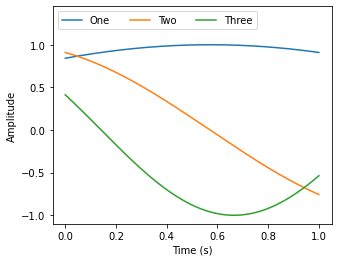

In [23]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_ylim(-1.1, 1.45)
ax.plot(t, y1, label='One')
ax.plot(t, y2, label='Two')
ax.plot(t, y3, label='Three')

ax.legend(loc='upper left', ncol=3)

plt.show()

### Custom lines and labels

Sometimes you might want to define legend entries manually:

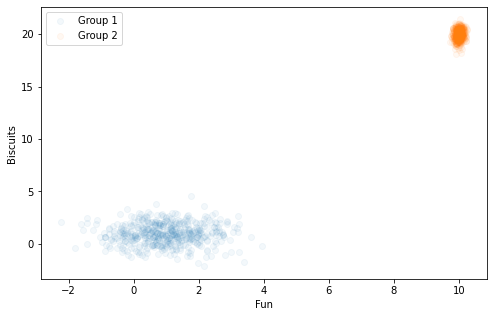

In [41]:
np.random.seed(123)

n = 500
x1 = np.random.normal(1, 1, n)
y1 = np.random.normal(1, 1, n)

x2 = np.random.normal(10, 0.1, n)
y2 = np.random.normal(20, 0.5, n)

alpha = 0.05
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.set_xlabel('Fun')
ax.set_ylabel('Biscuits')
ax.plot(x1, y1, 'o', alpha=0.05, label='Group 1')
ax.plot(x2, y2, 'o', alpha=0.05, label='Group 2')
ax.legend()
plt.show()

Yuck! This needs a custom legend:

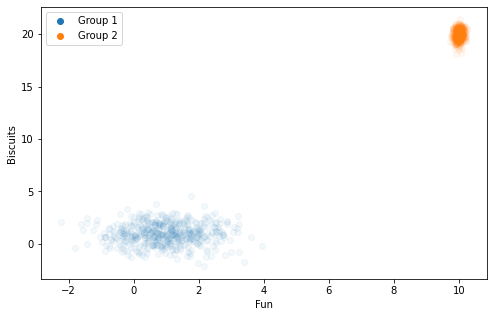

In [47]:
import matplotlib.lines

np.random.seed(123)

n = 500
x1 = np.random.normal(1, 1, n)
y1 = np.random.normal(1, 1, n)

x2 = np.random.normal(10, 0.1, n)
y2 = np.random.normal(20, 0.5, n)

alpha = 0.05
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.set_xlabel('Fun')
ax.set_ylabel('Biscuits')
ax.plot(x1, y1, 'o', alpha=0.05)
ax.plot(x2, y2, 'o', alpha=0.05)

lines = (
    matplotlib.lines.Line2D([0], [0], linestyle='none', color='tab:blue', marker='o'),
    matplotlib.lines.Line2D([0], [0], linestyle='none', color='tab:orange', marker='o'),
)
labels = ('Group 1', 'Group 2')
ax.legend(lines, labels)

plt.show()

## Annotations

## Horizontal and vertical lines

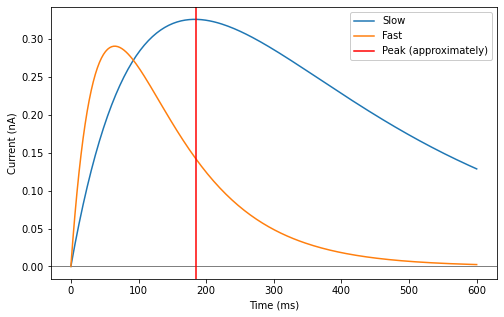

In [92]:
t = np.linspace(0, 600, 200)

slow = np.exp(-t / 300) * (1 - np.exp(-t / 200))
fast = np.exp(-t / 100) * (1 - np.exp(-t / 80))

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Current (nA)')
ax.plot(t, slow, label='Slow')
ax.plot(t, fast, label='Fast')

ax.axhline(0, color='grey', lw=1, zorder=1)

ax.axvline(185, color='red', label='Peak (approximately)')

ax.legend(loc='upper right', framealpha=1)

plt.show()

### Shaded areas

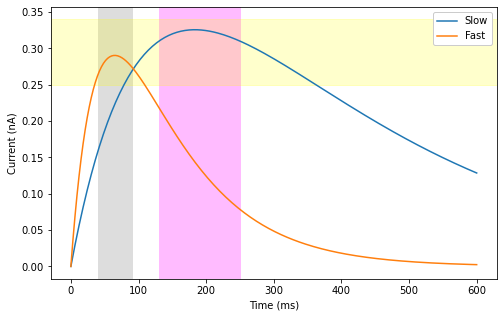

In [93]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Current (nA)')
ax.plot(t, slow, label='Slow')
ax.plot(t, fast, label='Fast')

ax.axvspan(40, 90, color='#dddddd')

ax.axvspan(130, 250, color='#ffbbff')

ax.axhspan(0.25, 0.34, color='#ffff00', alpha=0.2)

ax.legend(loc='upper right', framealpha=1)

plt.show()

### Text

Font information can be provided in a dictionary.

Horizontal and vertical alignment can be set with `horizontalalignment` (`ha`) and `verticalalignment` (`va`).

Text can be added using data coordinates (default) or coordinates relative to axes length.
You choose between these by setting the appropriate [transformation](https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html), e.g. `ax.transData` or `ax.transAxes`.

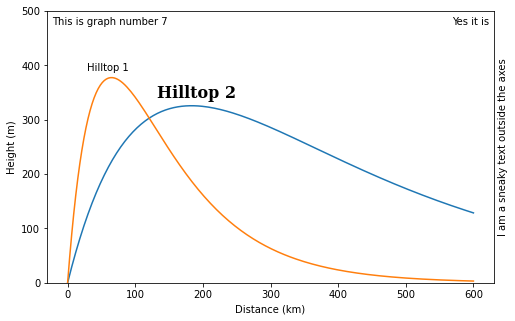

In [131]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot()
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Height (m)')
ax.set_ylim(0, 500)
ax.plot(t, slow * 1e3)
ax.plot(t, fast * 13e2)

fontdict = dict(size=16, font='Serif', weight='bold')
# Alternative syntax for fontdict = {'size': 16, 'font': 'Serif', 'weight': 'bold'}

# Text in "data coordinates"
ax.text(60, 390, 'Hilltop 1', horizontalalignment='center')
ax.text(190, 340, 'Hilltop 2', fontdict=fontdict, ha='center')

# Text in "axes coordinates"
ax.text(0.01, 0.95, 'This is graph number 7', transform=ax.transAxes)
ax.text(0.99, 0.95, 'Yes it is', ha='right', transform=ax.transAxes)

ax.text(1.01, 0.5, 'I am a sneaky text outside the axes', transform=ax.transAxes, rotation='vertical', va='center')

plt.show()